# cross validation

In [3]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Downsample both Public University and Private University to 226 instances each
public_university = df[df['Name of your current institution? '] == 'Public University'].sample(226, random_state=42)
private_university = df[df['Name of your current institution? '] == 'Private University'].sample(226, random_state=42, replace=True)
balanced_df = pd.concat([public_university, private_university])


# Assuming the last column is the target variable
target_column = balanced_df.columns[-1]

# Remove leading and trailing spaces from the target column
balanced_df[target_column] = balanced_df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = balanced_df.drop(columns=[target_column])
y = balanced_df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns),
        ('passthrough', 'passthrough', [X.columns[0], X.columns[1]])
    ],
    remainder='drop'
)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Create pipelines for each classifier
classifiers = {
    'RandomForestClassifier': make_pipeline(preprocessor, RandomForestClassifier(random_state=42)),
    'SVC': make_pipeline(preprocessor, StandardScaler(), SVC(random_state=42)),
    'MLPClassifier': make_pipeline(preprocessor, StandardScaler(), MLPClassifier(random_state=42)),
    'DecisionTreeClassifier': make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42)),
    'LogisticRegression': make_pipeline(preprocessor, StandardScaler(), LogisticRegression(random_state=42)),
    'GaussianNB': make_pipeline(preprocessor, GaussianNB()),
    'KNeighborsClassifier': make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier()),
    'AdaBoostClassifier': make_pipeline(preprocessor, AdaBoostClassifier(random_state=42)),
    'GradientBoostingClassifier': make_pipeline(preprocessor, GradientBoostingClassifier(random_state=42)),
    'XGBClassifier': make_pipeline(preprocessor, XGBClassifier(random_state=42)),
    'LGBMClassifier': make_pipeline(preprocessor, LGBMClassifier(random_state=42)),
    'CatBoostClassifier': make_pipeline(preprocessor, CatBoostClassifier(random_state=42, verbose=False)),
    'ExtraTreesClassifier': make_pipeline(preprocessor, ExtraTreesClassifier(random_state=42)),
    'BaggingClassifier': make_pipeline(preprocessor, BaggingClassifier(random_state=42))
}

# Define hyperparameter grids for each classifier
param_grids = {
    'RandomForestClassifier': {
        'randomforestclassifier__n_estimators': [50, 100, 200],
        'randomforestclassifier__max_depth': [None, 10, 20],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4]
    },
    'SVC': {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf', 'poly'],
        'svc__gamma': ['scale', 'auto']
    },
    'MLPClassifier': {
        'mlpclassifier__hidden_layer_sizes': [(50,), (100, 50), (100, 50, 20)],
        'mlpclassifier__max_iter': [200, 500, 1000],
        'mlpclassifier__alpha': [0.0001, 0.001, 0.01]
    },
    'DecisionTreeClassifier': {
        'decisiontreeclassifier__max_depth': [None, 5, 10, 20],
        'decisiontreeclassifier__min_samples_split': [2, 5, 10],
        'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
    },
    'LogisticRegression': {
        'logisticregression__C': [0.1, 1, 10],
        'logisticregression__max_iter': [50, 100, 200]
    },
    'KNeighborsClassifier': {
        'kneighborsclassifier__n_neighbors': [3, 5, 7],
        'kneighborsclassifier__weights': ['uniform', 'distance']
    },
    'AdaBoostClassifier': {
        'adaboostclassifier__n_estimators': [50, 100, 200],
        'adaboostclassifier__learning_rate': [0.1, 0.5, 1]
    },
    'GradientBoostingClassifier': {
        'gradientboostingclassifier__n_estimators': [50, 100, 200],
        'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5],
        'gradientboostingclassifier__max_depth': [3, 5, 10]
    },
    'XGBClassifier': {
        'xgbclassifier__n_estimators': [50, 100, 200],
        'xgbclassifier__learning_rate': [0.01, 0.1, 0.5],
        'xgbclassifier__max_depth': [3, 5, 10]
    },
    'LGBMClassifier': {
        'lgbmclassifier__n_estimators': [50, 100, 200],
        'lgbmclassifier__learning_rate': [0.01, 0.1, 0.5],
        'lgbmclassifier__max_depth': [3, 5, 10]
    },
    'CatBoostClassifier': {
        'catboostclassifier__n_estimators': [50, 100, 200],
        'catboostclassifier__learning_rate': [0.01, 0.1, 0.5],
        'catboostclassifier__max_depth': [3, 5, 10]
    },
    'ExtraTreesClassifier': {
        'extratreesclassifier__n_estimators': [50, 100, 200],
        'extratreesclassifier__max_depth': [None, 5, 10, 20],
        'extratreesclassifier__min_samples_split': [2, 5, 10],
        'extratreesclassifier__min_samples_leaf': [1, 2, 4]
    },
    'BaggingClassifier': {
        'baggingclassifier__n_estimators': [50, 100, 200],
        'baggingclassifier__max_samples': [0.5, 0.7, 1.0],
        'baggingclassifier__max_features': [0.5, 0.7, 1.0]
    }
}

# Perform K-fold cross-validation and grid search for each classifier
def kfold_cross_validation_with_gridsearch(X, y, classifiers, param_grids, k=10):
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for name, classifier in classifiers.items():
        print(f"Evaluating {name}...")
        if name in param_grids:
            grid_search = GridSearchCV(classifier, param_grids[name], cv=kf, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X, y)
            print("Best parameters found:")
            print(grid_search.best_params_)
            print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
            # Cross-validation accuracy across all folds
            cv_accuracy = cross_val_score(grid_search.best_estimator_, X, y, cv=kf, scoring='accuracy')
            print("Average cross-validation accuracy: {:.2f}".format(cv_accuracy.mean()))
            predictions = cross_val_predict(grid_search.best_estimator_, X, y, cv=kf)
        else:
            # If classifier does not require hyperparameter tuning
            grid_search = classifier
            grid_search.fit(X, y)
            # Cross-validation accuracy across all folds
            cv_accuracy = cross_val_score(grid_search, X, y, cv=kf, scoring='accuracy')
            print("Average cross-validation accuracy: {:.2f}".format(cv_accuracy.mean()))
            predictions = cross_val_predict(grid_search, X, y, cv=kf)
        report = classification_report(y, predictions)
        print(f"Classification Report:\n{report}\n{'='*40}\n")

# Perform K-fold cross-validation with grid search
kfold_cross_validation_with_gridsearch(X, y, classifiers, param_grids)



Evaluating RandomForestClassifier...
Best parameters found:
{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Best cross-validation accuracy: 0.89
Average cross-validation accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       226
           1       0.93      0.85      0.89       226

    accuracy                           0.89       452
   macro avg       0.90      0.89      0.89       452
weighted avg       0.90      0.89      0.89       452


Evaluating SVC...
Best parameters found:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.84
Average cross-validation accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       226
           1      

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters found:
{'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 1000}
Best cross-validation accuracy: 0.85
Average cross-validation accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       226
           1       0.88      0.81      0.84       226

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.85      0.85      0.85       452


Evaluating DecisionTreeClassifier...
Best parameters found:
{'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Best cross-validation accuracy: 0.85
Average cross-validation accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       226
           1       0.86      0.84  

Evaluating RandomForestClassifier...
Best parameters found:
{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Best cross-validation accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       226
           1       0.93      0.85      0.89       226

    accuracy                           0.89       452
   macro avg       0.90      0.89      0.89       452
weighted avg       0.90      0.89      0.89       452


Evaluating SVC...
Best parameters found:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       226
           1       0.87      0.81      0.83       226

    accuracy                           0.84

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters found:
{'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 1000}
Best cross-validation accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       226
           1       0.88      0.81      0.84       226

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.85      0.85      0.85       452


Evaluating DecisionTreeClassifier...
Best parameters found:
{'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Best cross-validation accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       226
           1       0.86      0.84      0.85       226

    accuracy                           0.85       452
   mac

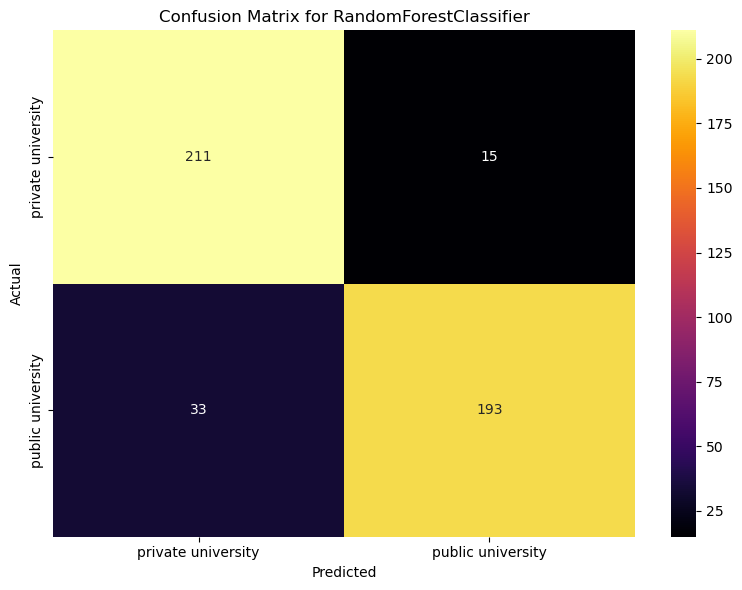

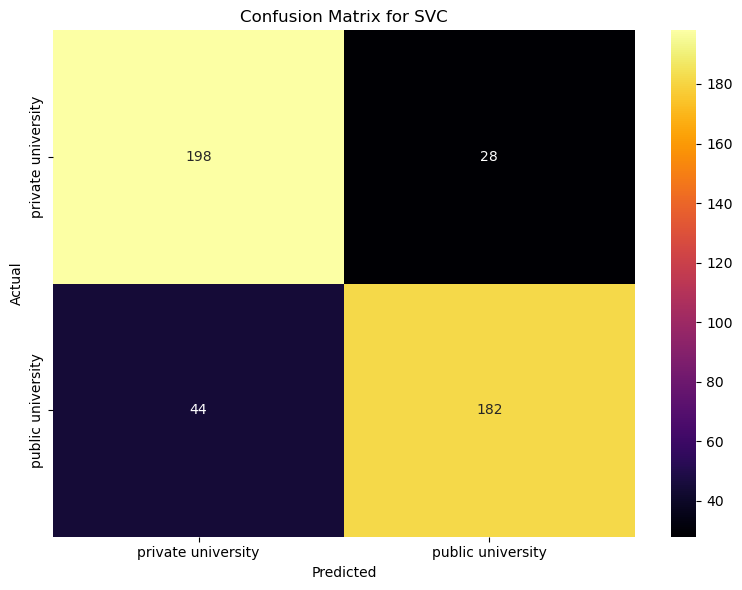

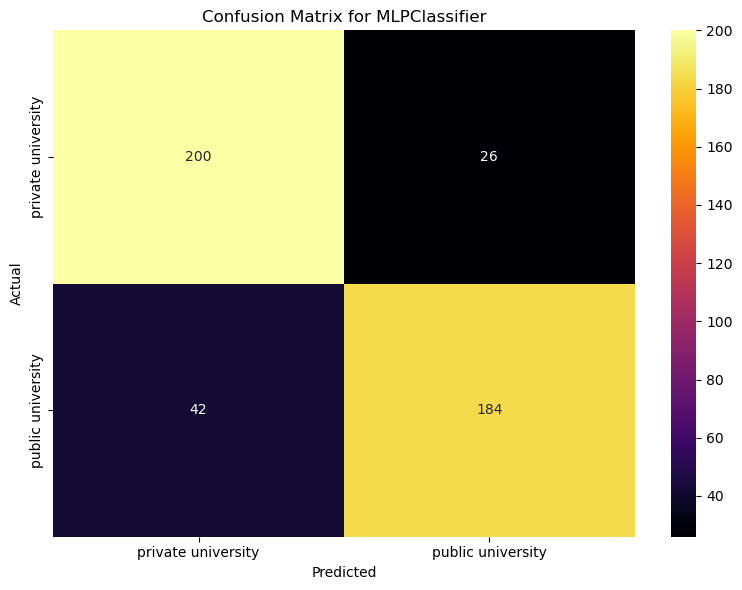

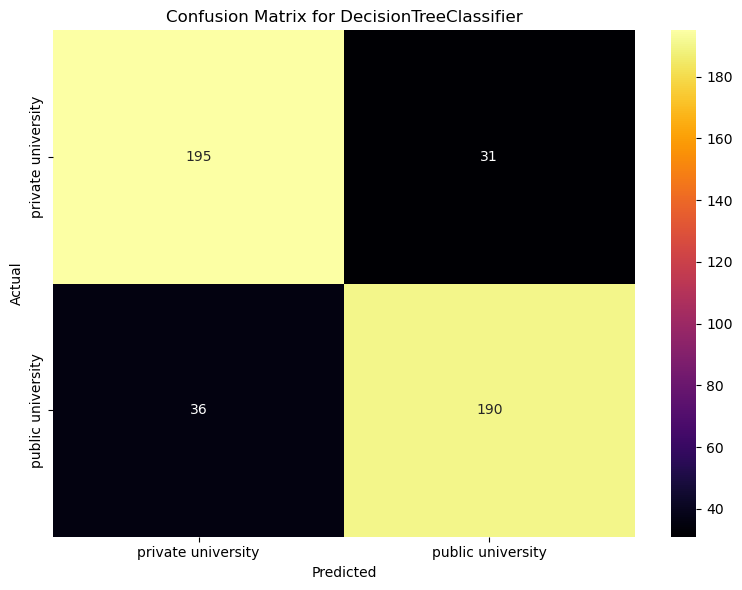

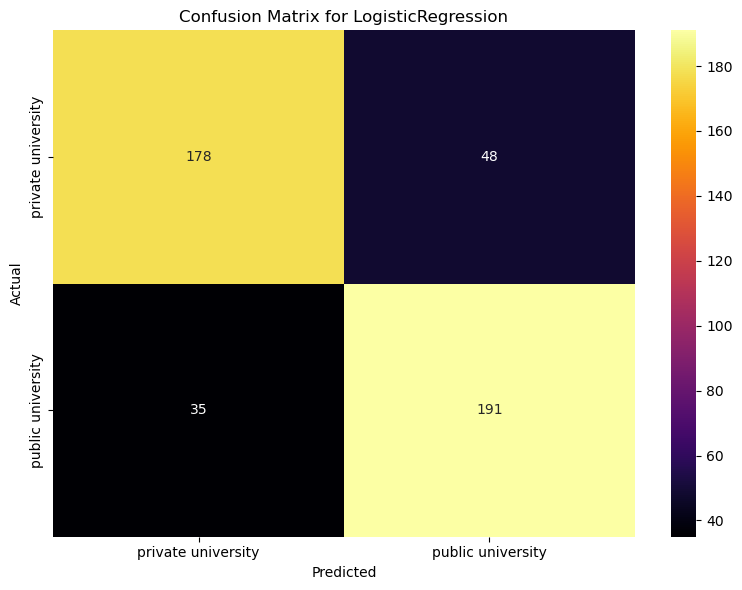

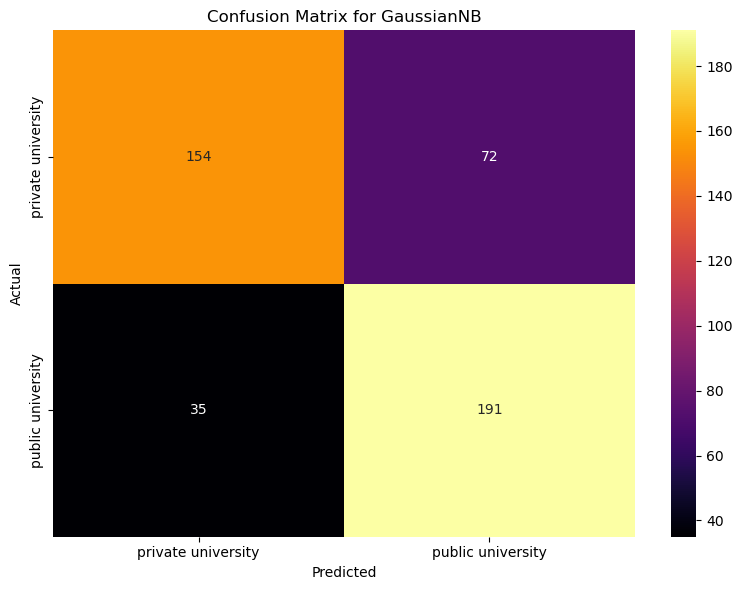

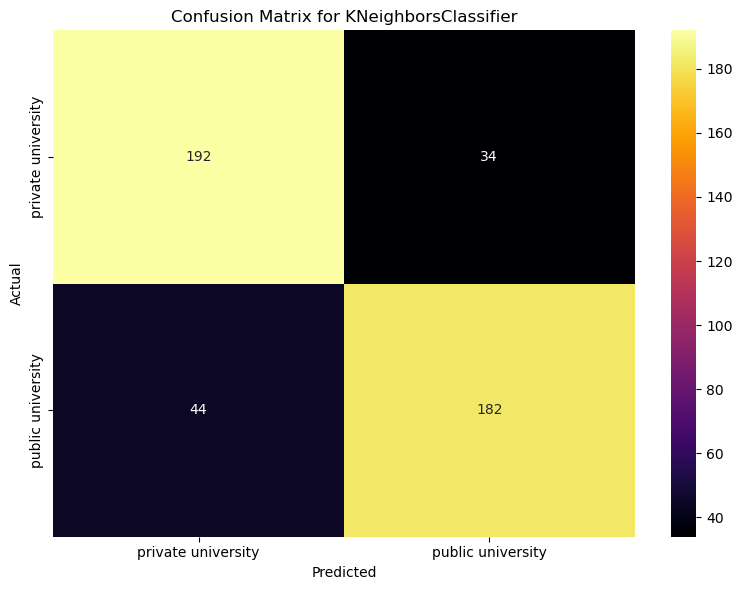

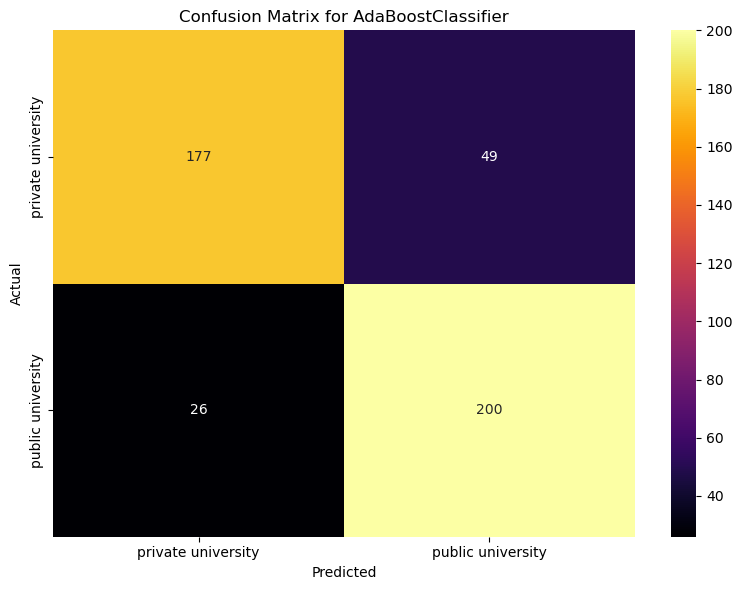

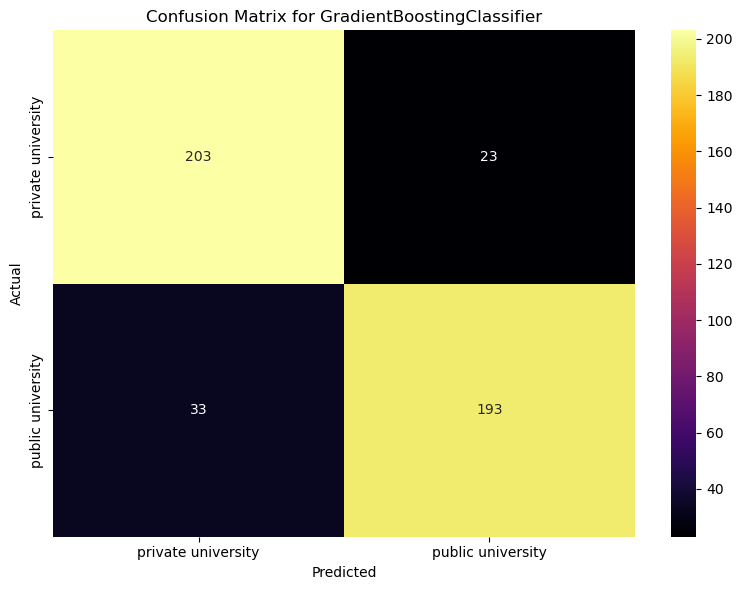

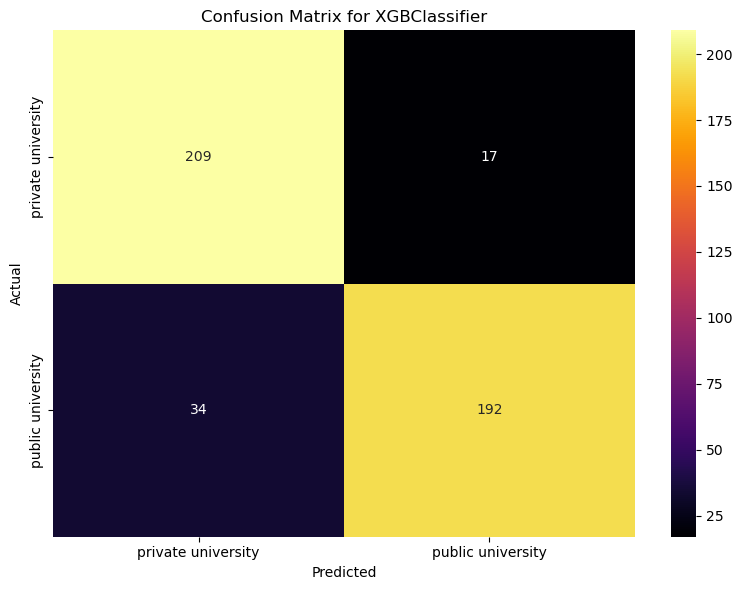

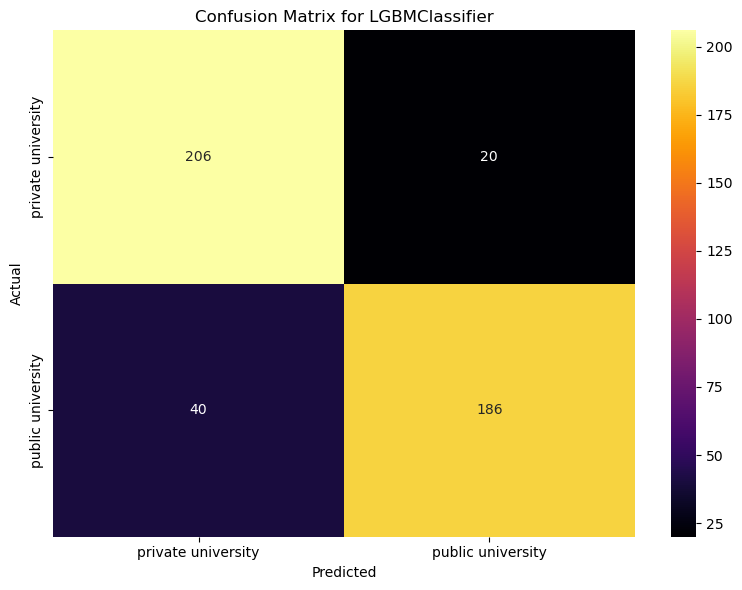

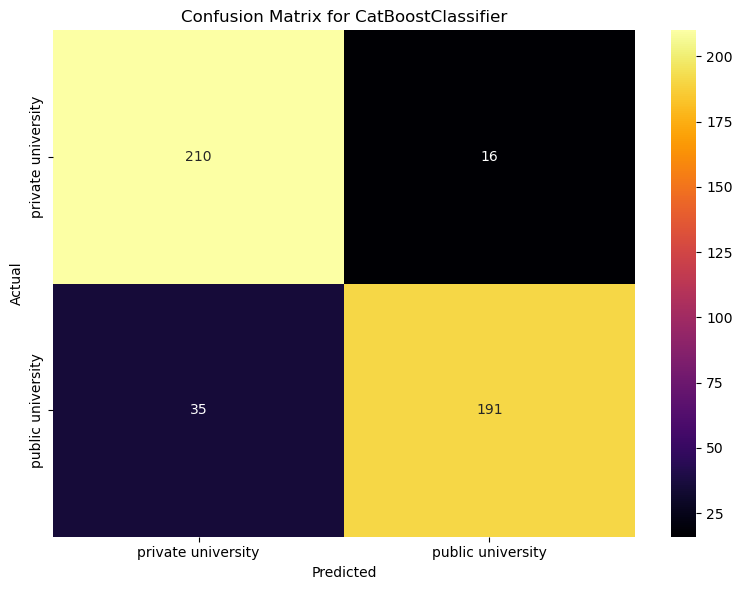

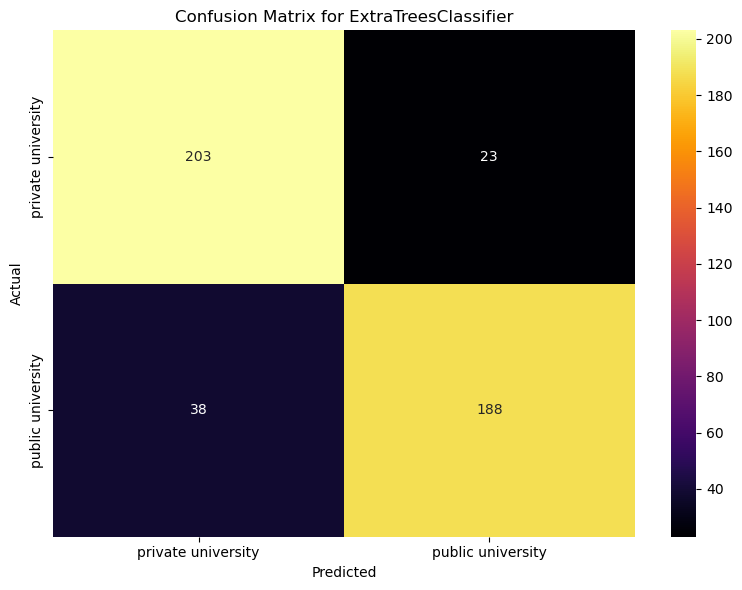

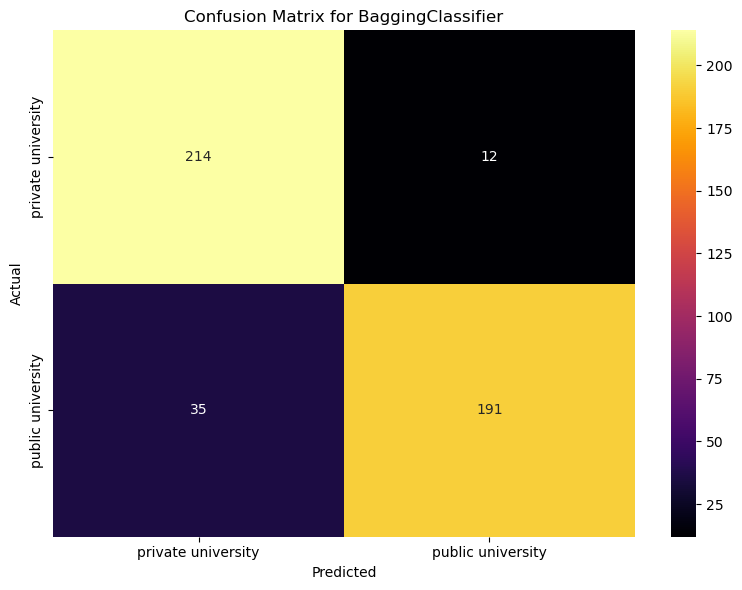

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, classifier_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f'{classifier_name}_confusion_matrix.pdf', bbox_inches='tight')

def kfold_cross_validation_with_confusion_matrix(X, y, classifiers, param_grids, k=10):
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for name, classifier in classifiers.items():
        print(f"Evaluating {name}...")
        if name in param_grids:
            grid_search = GridSearchCV(classifier, param_grids[name], cv=kf, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X, y)
            print("Best parameters found:")
            print(grid_search.best_params_)
            print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
            predictions = cross_val_predict(grid_search.best_estimator_, X, y, cv=kf)
        else:
            # If classifier does not require hyperparameter tuning
            grid_search = classifier
            grid_search.fit(X, y)
            predictions = cross_val_predict(grid_search, X, y, cv=kf)
        report = classification_report(y, predictions)
        print(f"Classification Report:\n{report}\n{'='*40}\n")
        plot_confusion_matrix(y, predictions, ['private university', 'public university'], name)

# Perform K-fold cross-validation with confusion matrix and save to PDF
kfold_cross_validation_with_confusion_matrix(X, y, classifiers, param_grids)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


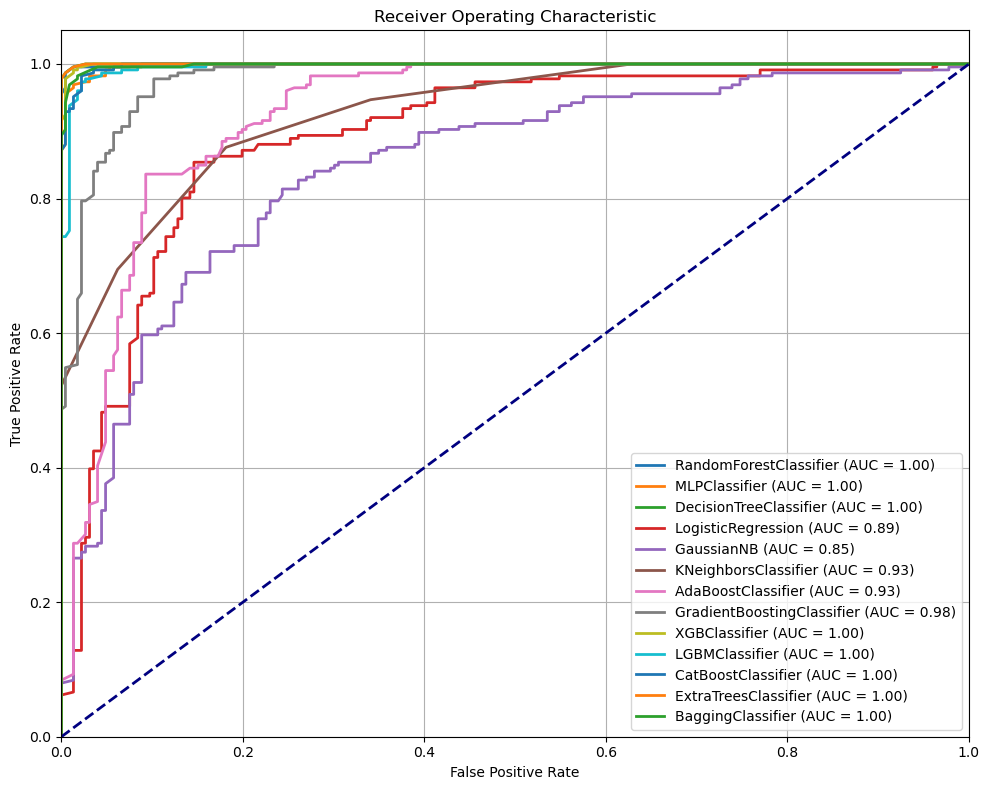

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for each classifier
def plot_roc_curve(X, y, classifiers):
    plt.figure(figsize=(10, 8))
    for name, classifier in classifiers.items():
        if hasattr(classifier, "predict_proba"):  # Check if the classifier has predict_proba method
            probas = classifier.fit(X, y).predict_proba(X)
            fpr, tpr, thresholds = roc_curve(y, probas[:, 1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')  # Increased thickness to 2
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Adjust the thickness of the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("roc_curves.pdf", bbox_inches='tight')
    plt.show()

# Plot ROC curves for all classifiers
plot_roc_curve(X, y, classifiers)



In [59]:
for name, classifier in classifiers.items():
    if name in ['RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier',
                'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']:
        classifier.fit(X, y)
        if name == 'RandomForestClassifier':
            feature_importance = classifier.named_steps['randomforestclassifier'].feature_importances_
        elif name == 'ExtraTreesClassifier':
            feature_importance = classifier.named_steps['extratreesclassifier'].feature_importances_
        elif name == 'GradientBoostingClassifier':
            feature_importance = classifier.named_steps['gradientboostingclassifier'].feature_importances_
        elif name == 'XGBClassifier':
            feature_importance = classifier.named_steps['xgbclassifier'].feature_importances_
        elif name == 'LGBMClassifier':
            feature_importance = classifier.named_steps['lgbmclassifier'].feature_importances_
        elif name == 'CatBoostClassifier':
            feature_importance = classifier.named_steps['catboostclassifier'].feature_importances_
        
        # Create a dictionary to store feature importance with their column names
        feature_importance_dict = dict(zip(X.columns, feature_importance))
        
        # Sort features by their importance (descending order)
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
        
        print(f"Feature importance for {name} (most important to least important):")
        for column, importance in sorted_feature_importance:
            print(f"{column}: {importance}")
        print('=' * 40)


Feature importance for RandomForestClassifier (most important to least important):
Did you have other bad habits like smoking/drug addiction?: 0.03215944376677043
What was your SSC GPA?: 0.026355393618374287
Where did you stay when preparing for the exam?: 0.025977996183066832
How was your family's economic condition : 0.022023860540704175
Did you involve with any type of relationship?: 0.02117809853973588
Were there any external factors that may have affected your performance on the test (e.g., personal issues, health concerns, financial challenges)?: 0.01797349634146013
How much time did you spend on social media/other activities while preparing for the exam?: 0.016996917601297824
Were you involved in politics while preparing for the exam?: 0.012085721953272009
What was your HSC GPA?: 0.011545907309322812
How was the educational status of your family?: 0.011258130935059486
The average duration of study in a single day during admission preparation-: 0.010424698053801888
Did you stay w